# Классификация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import sklearn
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Обработка данных

Наш исходный набор данных уже не содержит пропущенных значений, поэтому данные можно считать нормализованными.

In [2]:
df = pd.read_csv('../data/SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


В качестве предсказываемого признака возьмём популярность трека. Разделим все треки по `popularity` на низкопопулярные (от 0 до 50), среднепопулярные (от 51 до 80) и высокопопулярные (от 81 до 100). Произведём дискретизацию по этим категориям.

In [3]:
df['popularity_class'] = df.apply(lambda row: 2 if row.popularity > 80 else 1 if row.popularity > 50 else 0, axis = 1)
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0


В качестве предсказывающих количественных признаков будем использовать `acousticness`, `danceability`, `energy` и `valence`.

In [4]:
cdf = pd.DataFrame(df, columns = ['acousticness', 'danceability', 'energy', 'valence', 'popularity_class'])
cdf

,acousticness,danceability,energy,valence,popularity_class
0,0.61100,0.389,0.910,0.814,0
1,0.24600,0.590,0.737,0.816,0
2,0.95200,0.663,0.131,0.368,0
3,0.70300,0.240,0.326,0.227,0
4,0.95000,0.331,0.225,0.390,0
...,...,...,...,...,...
232720,0.00384,0.687,0.714,0.962,0
232721,0.03290,0.785,0.683,0.969,0
232722,0.90100,0.517,0.419,0.813,0
232723,0.26200,0.745,0.704,0.489,0


## Анализ данных

Изучим общие показатели предсказывающих признаков.

In [5]:
cdf.describe()

,acousticness,danceability,energy,valence,popularity_class
count,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.368560,0.554364,0.570958,0.454917,0.346293
std,0.354768,0.185608,0.263456,0.260065,0.484638
min,0.000000,0.056900,0.000020,0.000000,0.000000
25%,0.037600,0.435000,0.385000,0.237000,0.000000
50%,0.232000,0.571000,0.605000,0.444000,0.000000
75%,0.722000,0.692000,0.787000,0.660000,1.000000
max,0.996000,0.989000,0.999000,1.000000,2.000000


Взглянем на распределение целевого признака.

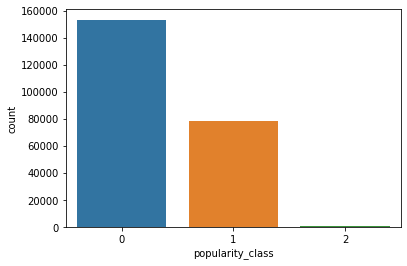

In [6]:
sns.countplot(x = 'popularity_class', data = cdf);

Изучим попарную корреляцию признаков.

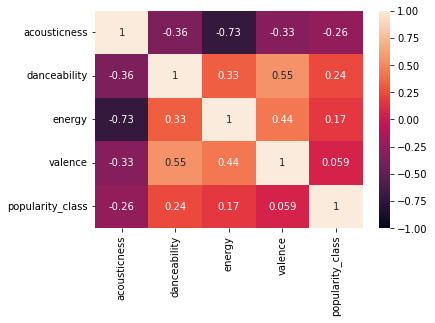

In [7]:
sns.heatmap(cdf.corr(), vmin = -1, vmax = 1, annot = True);

Изучим попарные представления данных и гистограммы для каждого признака.

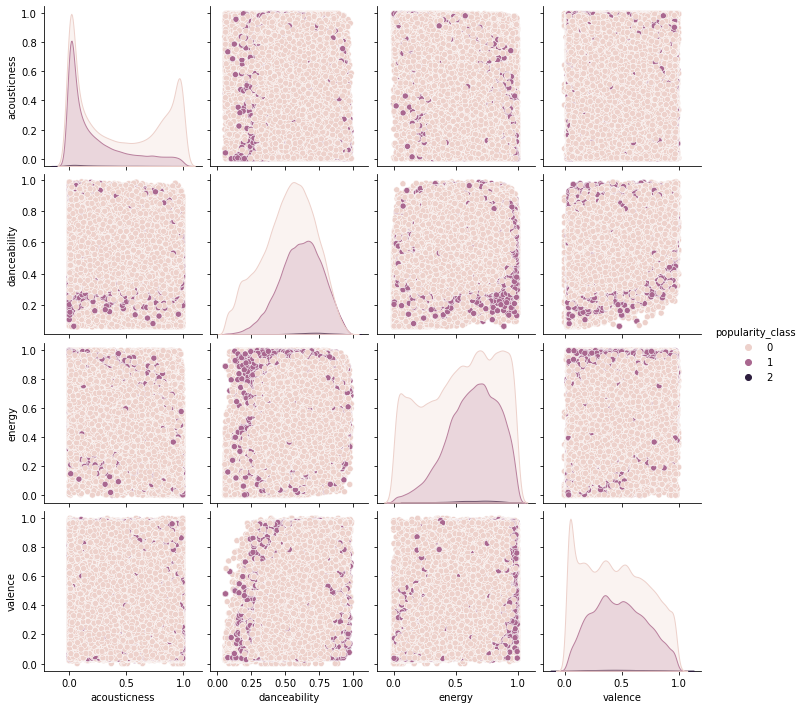

In [8]:
sns.pairplot(cdf, hue = 'popularity_class');

### Проверка на нормальность

Найдём признак, распределение которого наиболее близко к нормальному.

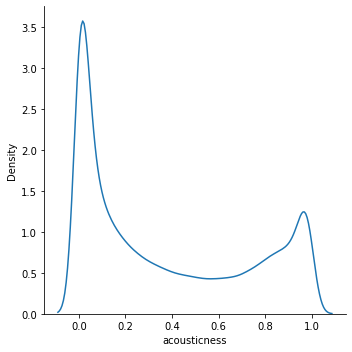

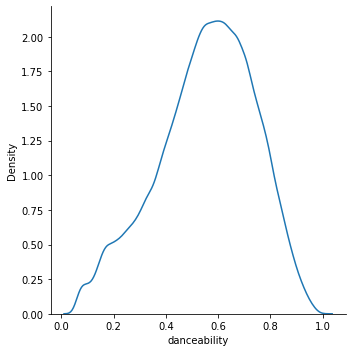

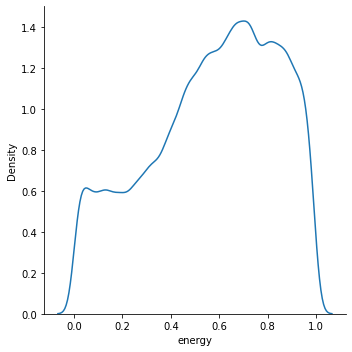

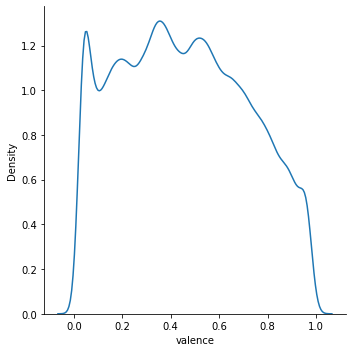

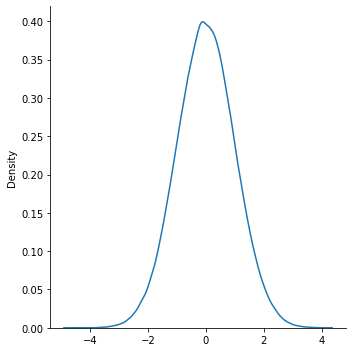

In [9]:
sns.displot(cdf.acousticness, kind = "kde")
sns.displot(cdf.danceability, kind = "kde")
sns.displot(cdf.energy, kind = "kde")
sns.displot(cdf.valence, kind = "kde")
sns.displot(np.random.normal(0, 1, len(cdf.index)), kind = "kde")

In [10]:
def mll_test(array):
    mu, sigma = stats.norm.fit(array)    
    distribution = stats.norm(loc = mu, scale = sigma)
    return st.mean(map(distribution.logpdf, array))

print('acousticness: ', mll_test(cdf.acousticness))
print('danceability: ', mll_test(cdf.danceability))
print('energy: ', mll_test(cdf.energy))
print('valence: ', mll_test(cdf.valence))
print('normal: ', mll_test(np.random.normal(0, 1, len(cdf.index))))

acousticness:  -0.38264527099966317
danceability:  0.2651807577389919
energy:  -0.08506581501620487
valence:  -0.0721145672714153
normal:  -1.4175977409028375


In [16]:
print('acousticness: ', stats.normaltest(cdf.acousticness))
print('danceability: ', stats.normaltest(cdf.danceability))
print('energy: ', stats.normaltest(cdf.energy))
print('valence: ', stats.normaltest(cdf.valence))

acousticness:  NormaltestResult(statistic=643351.5882335507, pvalue=0.0)
danceability:  NormaltestResult(statistic=7172.387839303274, pvalue=0.0)
energy:  NormaltestResult(statistic=26885.89541344705, pvalue=0.0)
valence:  NormaltestResult(statistic=58425.259297422104, pvalue=0.0)


## Обучение

In [12]:
x = cdf[['acousticness', 'danceability', 'energy', 'valence']]
y = cdf['popularity_class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, stratify = y, test_size = 0.2)

In [14]:
classifier = KNeighborsClassifier()
acc_score = cross_val_score(classifier, x, y).mean()
acc_score

0.6998130841121495